# MAT281 - Laboratorio N°10



<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0}) # target 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.
1. Normalizar las variables numéricas con el método **StandardScaler**.
3. Realizar un método de reducción de dimensionalidad visto en clases.
4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.




## 1.

### Desripición columnas DataFrame

In [3]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Distribución de los datos

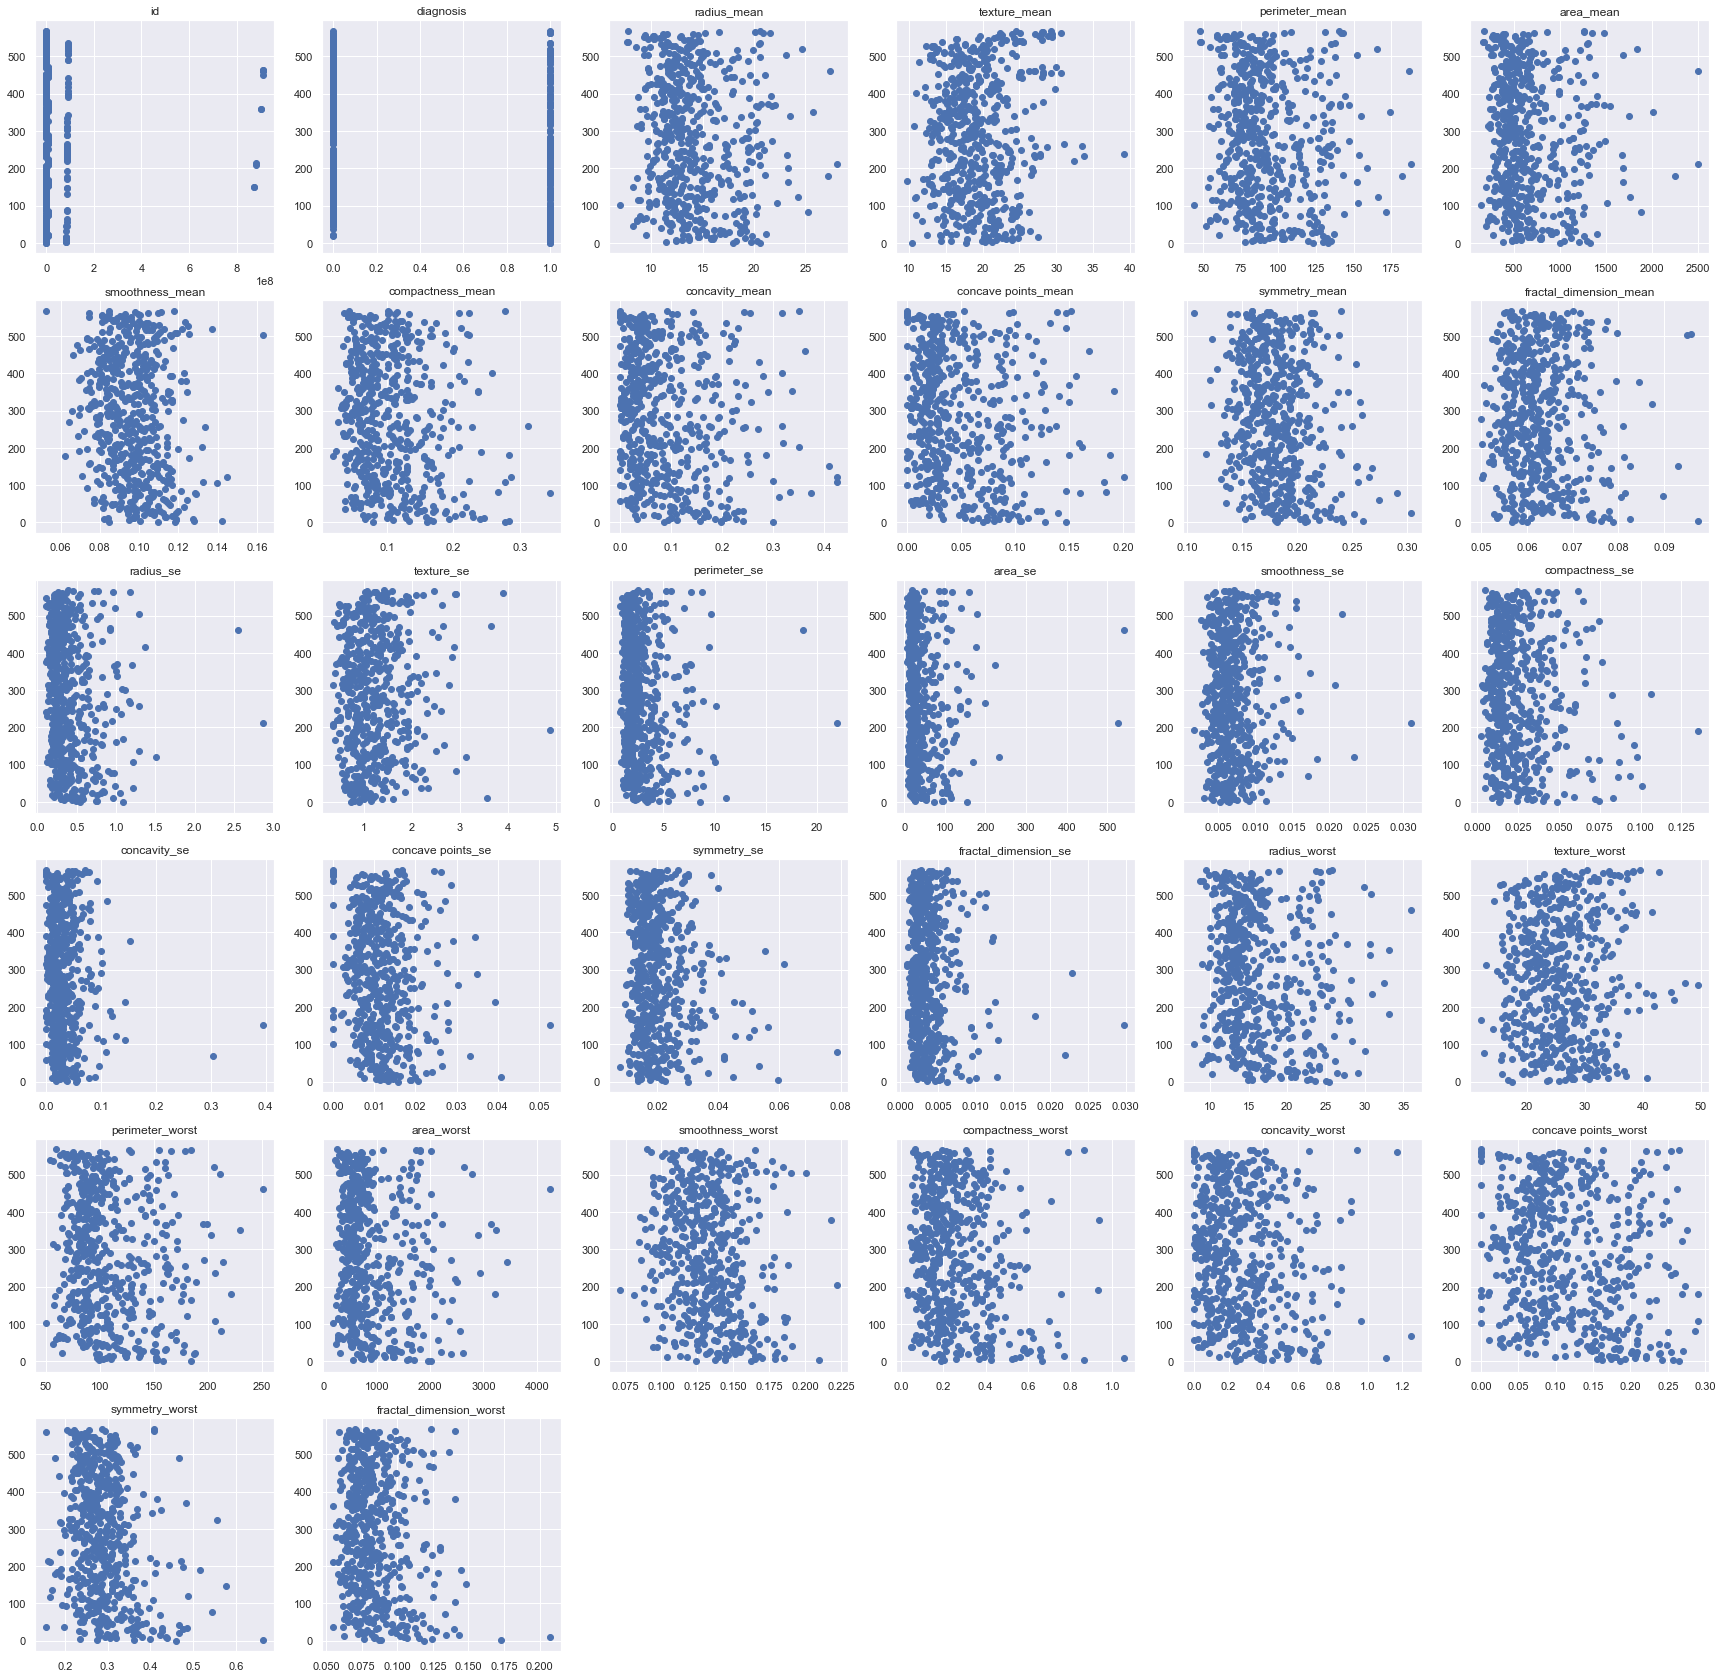

In [5]:
c = df.columns
y = [k for k in range(len(df))]
plt.figure(figsize = (30,30))
for k in range(32):
    plt.subplot(6,6,k+1)
    plt.scatter(df[c[k]], y)
    plt.title(c[k])

Notamos que los graficos de las columnas que terminan en _se son los menos dispersos en comparacion a las columnas que terminan en _mean y _worst, se ignoran los graficos de id y diagnosis.

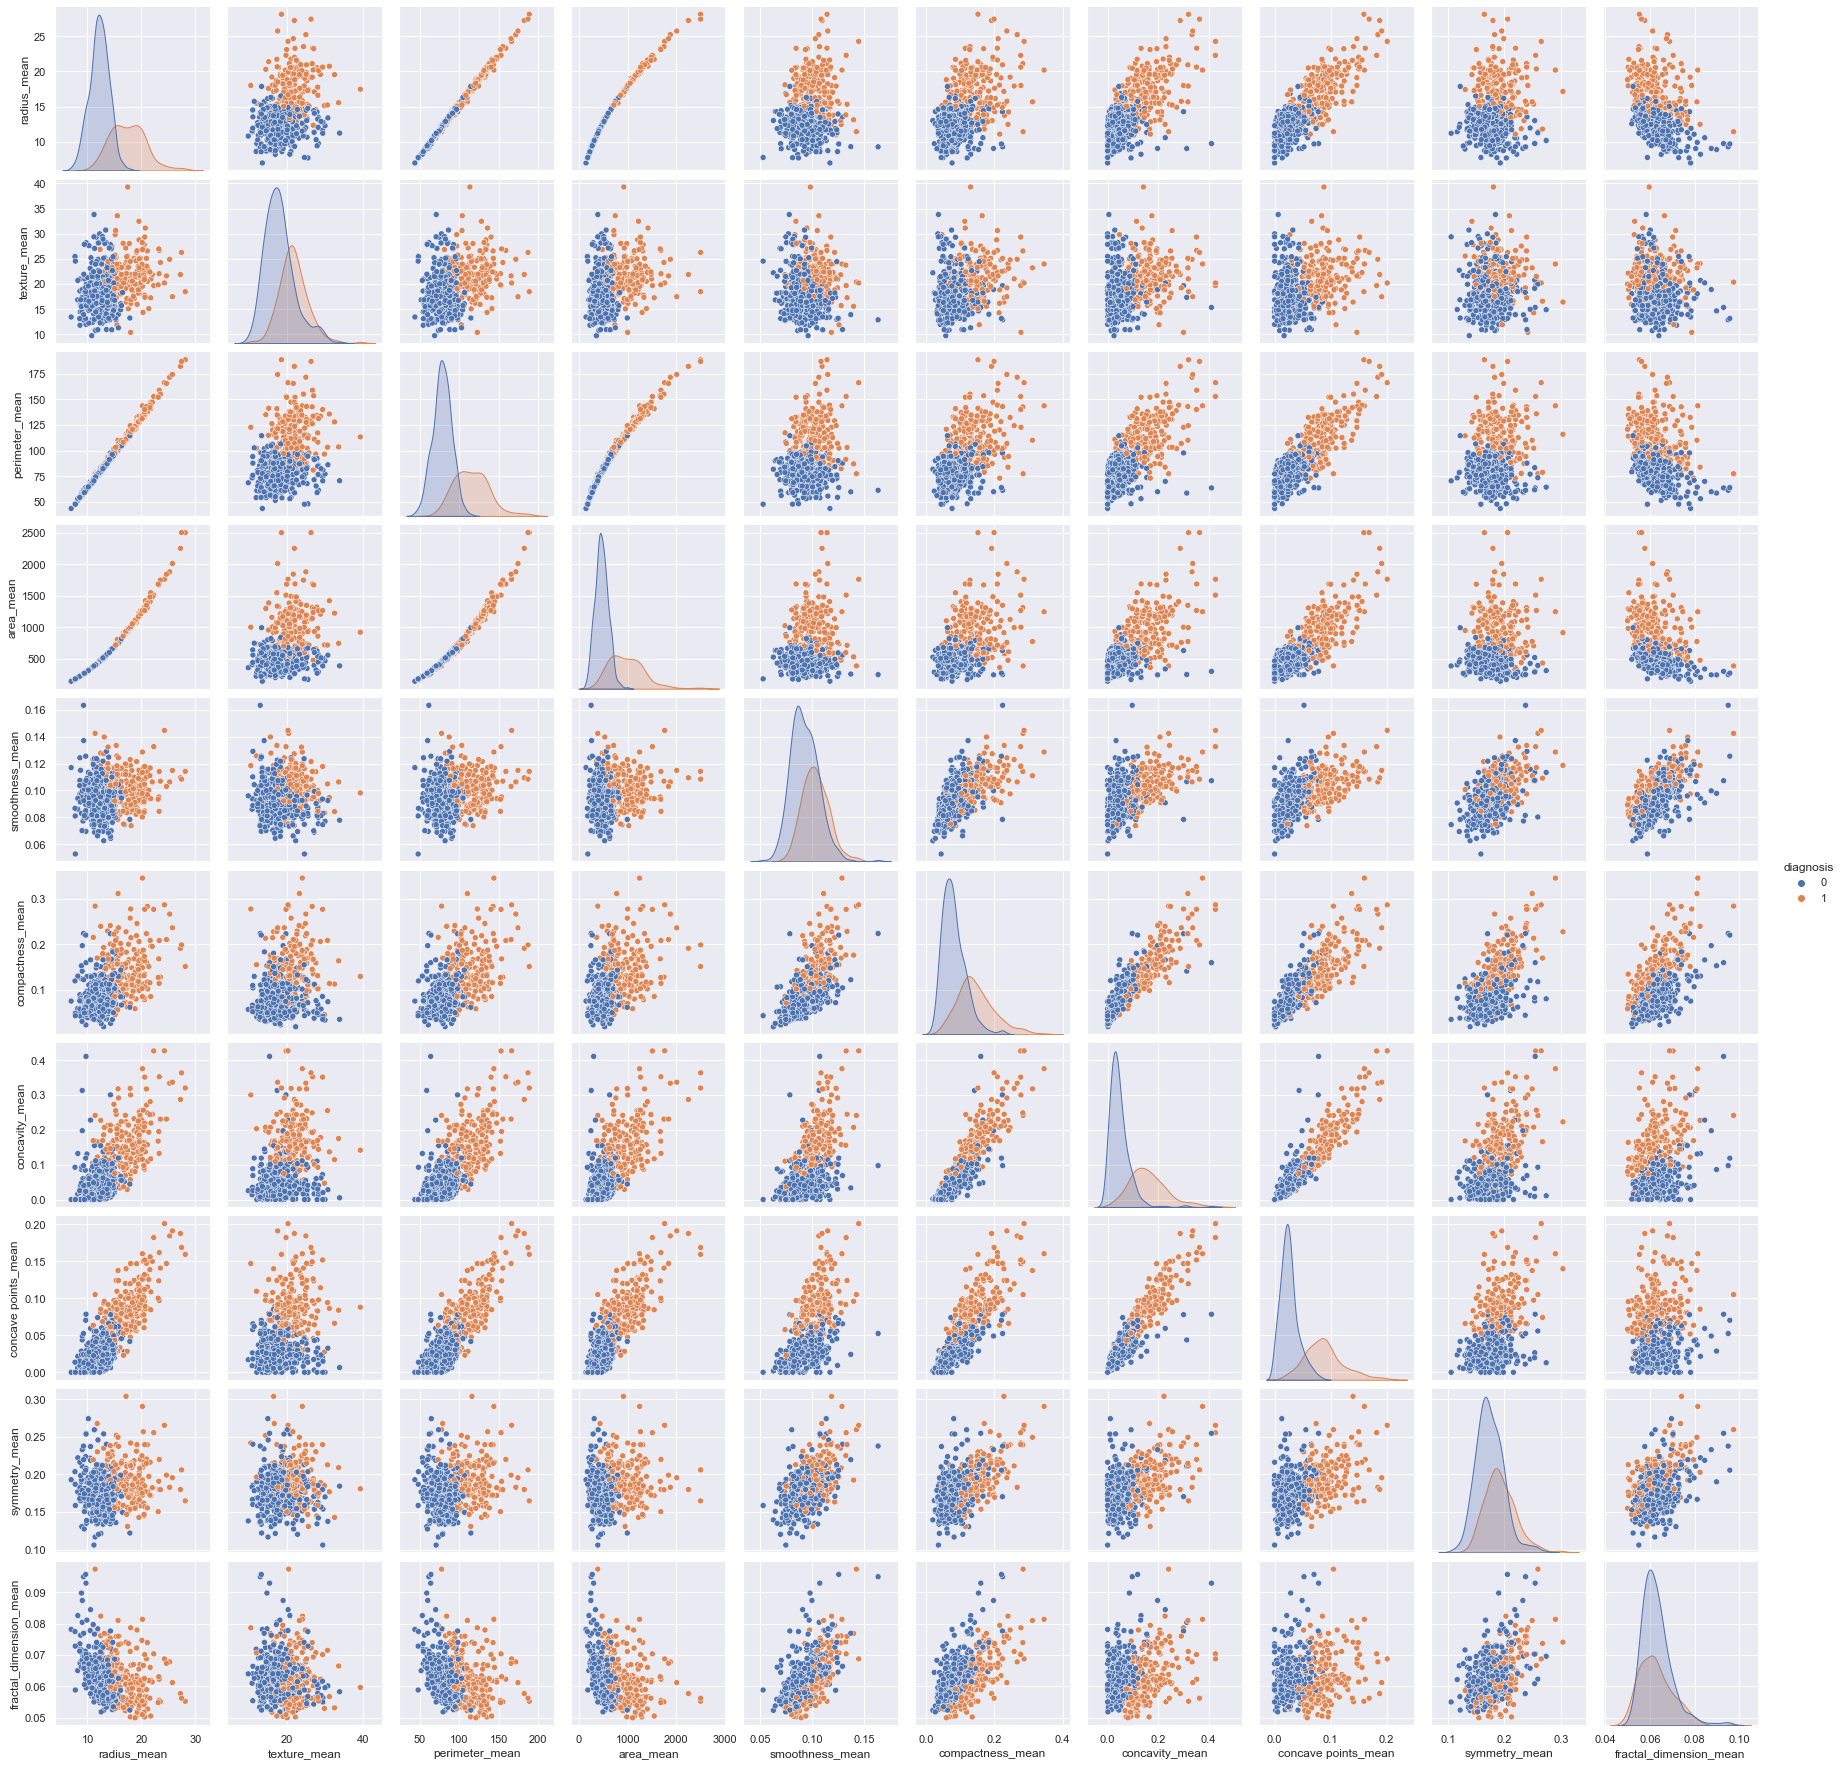

In [6]:
#scatter plot matrix para columnas "mean":
cols=["diagnosis",
     "radius_mean",
     "texture_mean",
     "perimeter_mean",
     "area_mean",
     "smoothness_mean",
     "compactness_mean",
     "concavity_mean",
     "concave points_mean",
     "symmetry_mean",
     "fractal_dimension_mean"]
sns.pairplot(data=df[cols], hue="diagnosis")
plt.show()

Notamos que raius_mean, perimeter_mean y area_mean tienen una forma visual que es lineal, lo cual tiene sentido considerando la relacion entre radio, perimetro y área.

### Correlaciones

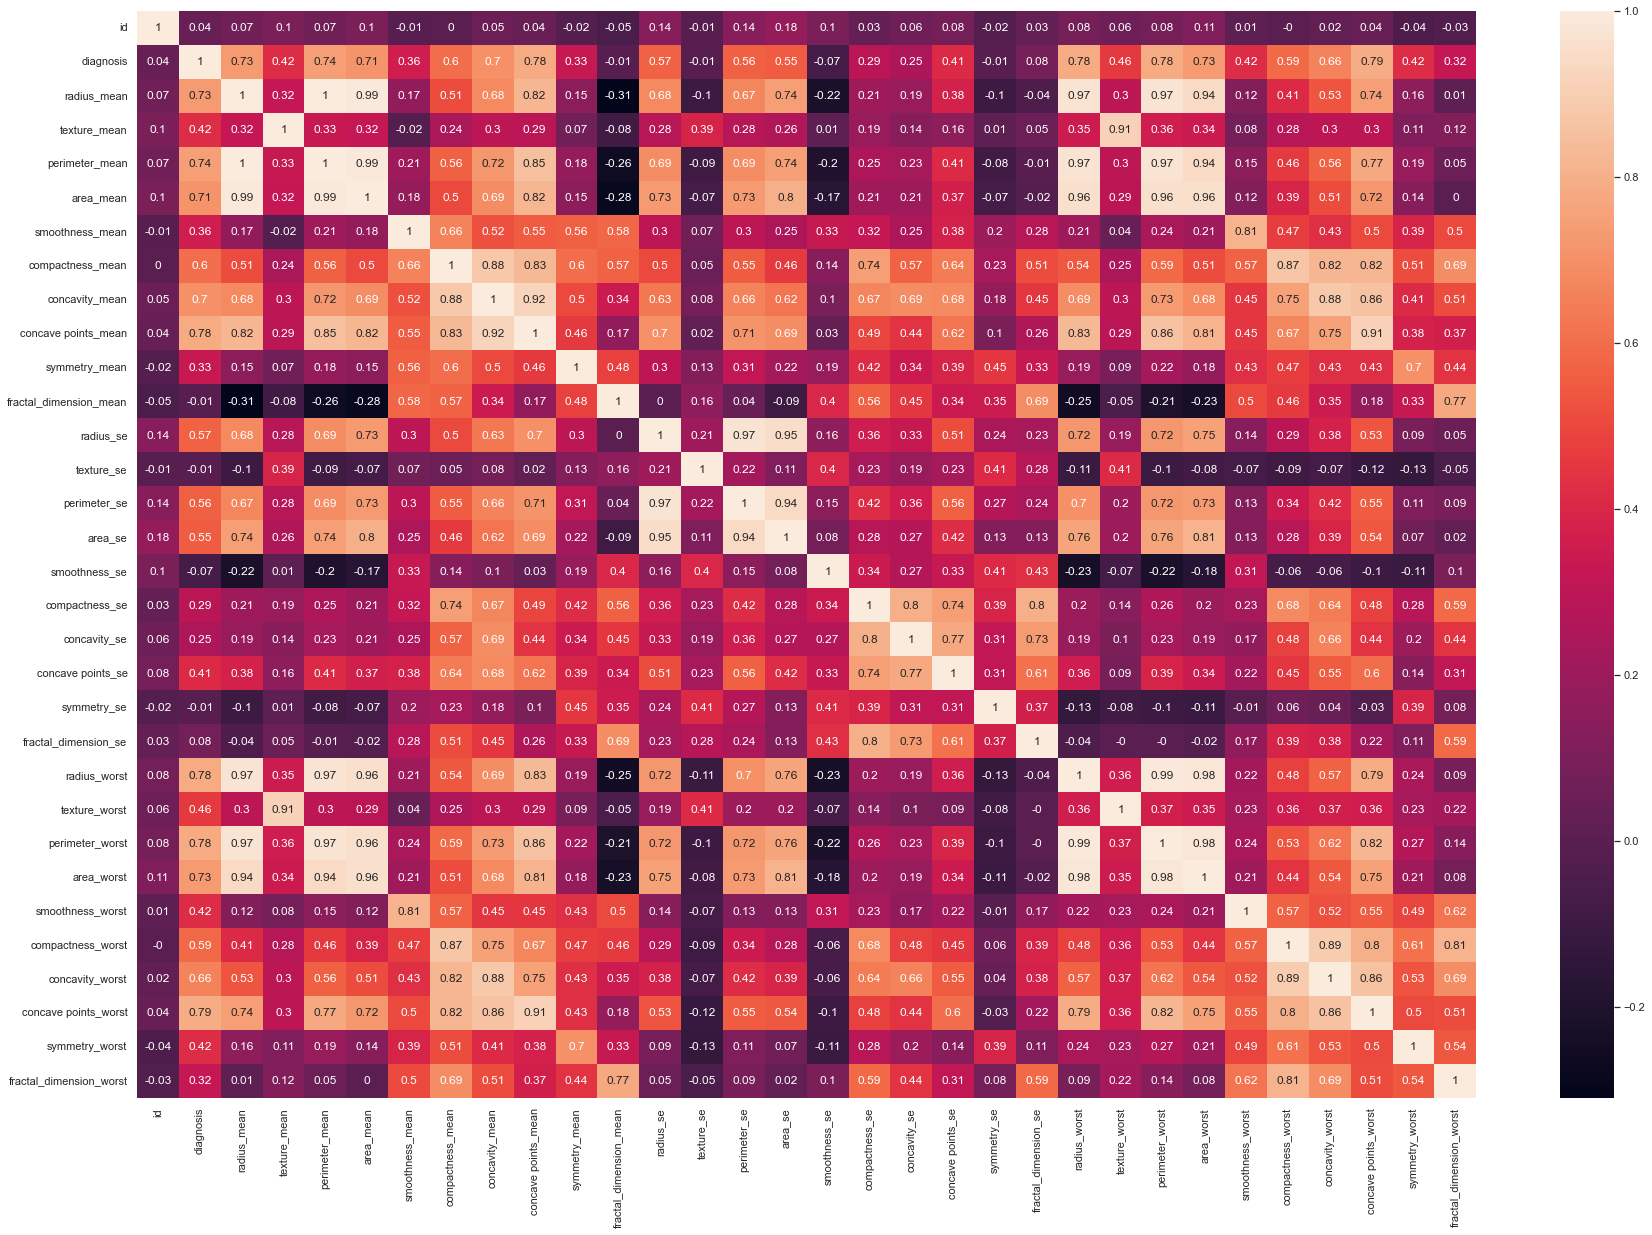

In [7]:
figure = plt.figure(figsize=(30,20))
sns.heatmap(df.corr().round(2), annot = True, fmt="g")
plt.show()

Se puede ignorar las correlaciones asociadas a id y diagnosis pues se sabe que no afectan al resto.

### Cantidad de memoria utilizada

In [8]:
memoria_columas = df .memory_usage()#memoria usada por columna
s = 0
for i in range(0,len(memoria_columas)):
    s += memoria_columas[i]#Se suma la memoria de las columnas
print('La memoria por columnas es:')
print(memoria_columas)
print('La memoria utilizada es:',s, 'bytes.')

La memoria por columnas es:
Index                       128
id                         4552
diagnosis                  4552
radius_mean                4552
texture_mean               4552
perimeter_mean             4552
area_mean                  4552
smoothness_mean            4552
compactness_mean           4552
concavity_mean             4552
concave points_mean        4552
symmetry_mean              4552
fractal_dimension_mean     4552
radius_se                  4552
texture_se                 4552
perimeter_se               4552
area_se                    4552
smoothness_se              4552
compactness_se             4552
concavity_se               4552
concave points_se          4552
symmetry_se                4552
fractal_dimension_se       4552
radius_worst               4552
texture_worst              4552
perimeter_worst            4552
area_worst                 4552
smoothness_worst           4552
compactness_worst          4552
concavity_worst            4552
concave poin

### Tipos de datos

In [9]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

### Valores nulos

In [10]:
df.isnull().values.any()

False

No hay valores nulos

## 2.

In [11]:
standard_df = (df
               .select_dtypes(include=['int64','float64'])
               .drop(["id","diagnosis"],axis=1) #Se dropean estas dos columnas pues no aportan al análisis
              )# columnas numéricas
#Se estandariza mediante StandarScaler:
standard_df[standard_df.columns] = StandardScaler().fit_transform(standard_df[standard_df.columns])
standard_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


## 3.

El metodo de reducción de dimencionalidad sera extracción de atributos con pca

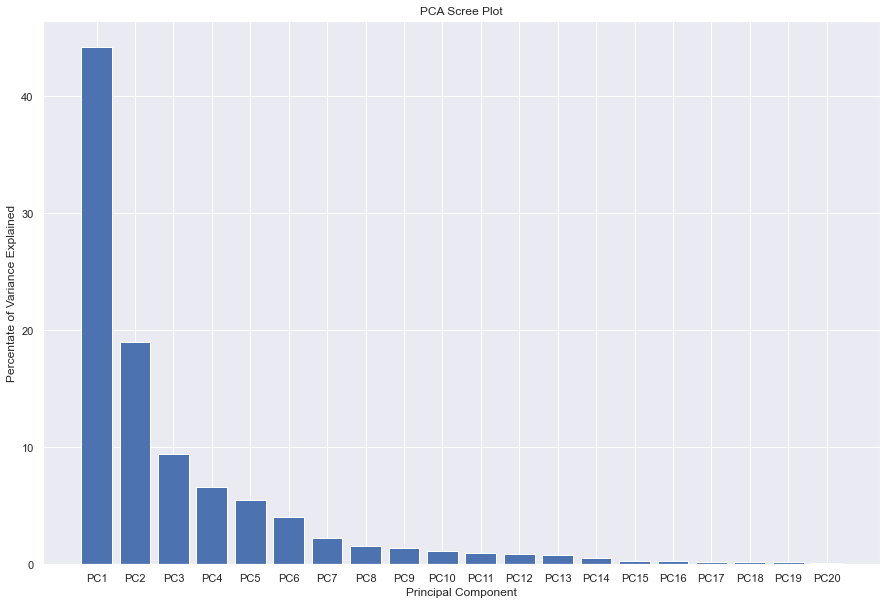

In [12]:
pca = PCA(n_components=20) #Se especifican los 20 n_components
principalComponents = pca.fit_transform(standard_df.values) #Se crean los componentes principales de standard_df

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = [f"PC{i}" for i in range(1,21)]

plt.figure(figsize=(15,10))
plt.bar(x= range(1,21), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

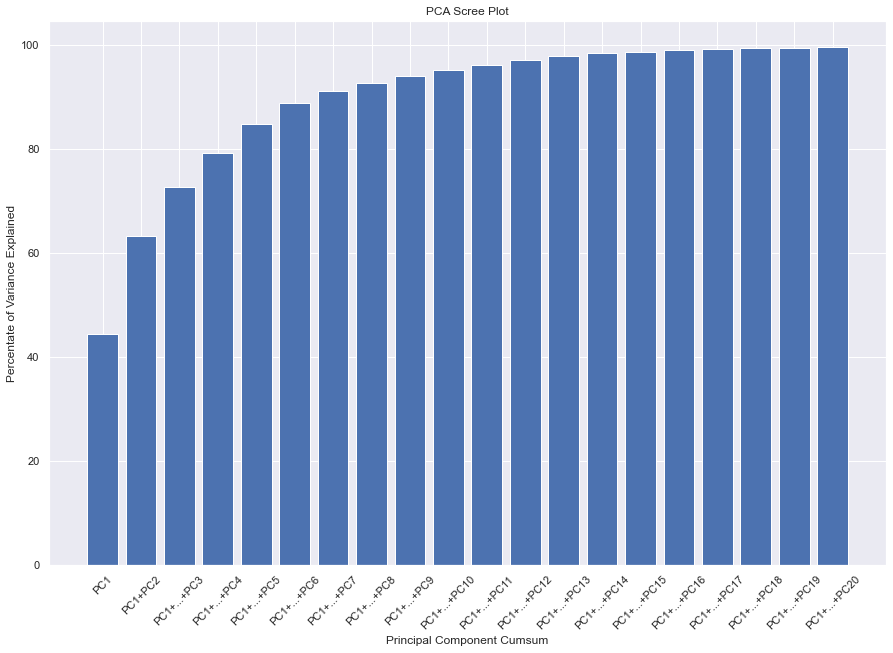

In [13]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)

columns_sum =[f"PC1+...+PC{i+1}" for i in range(2,20)]
columns_sum = ["PC1", "PC1+PC2"] + columns_sum

plt.figure(figsize=(15,10))
plt.bar(x= range(1,21), height=percent_variance_cum, tick_label=columns_sum)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.xticks(rotation = 45)
plt.title('PCA Scree Plot')
plt.show()

Se observa que para PC20 en adelante no hay mas varianza pues en el primer grafico no tiene ninguna barra y en el segundo la  la suma de PC1 hasta PC20 llega al 100.

## 4.

En esta parte se considerara como mas optimo cuando el f-score es el mayor posible

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

pD = pd.DataFrame(data = principalComponents, columns = [f"PC{i}" for i in range(1,21)])

x_train, x_pred, y_train, y_pred = train_test_split(pD, df["diagnosis"], test_size=0.3, train_size=0.7, random_state=42)


In [15]:
#Modelo de Regresión logística
s=0
for i in ['l2']:#recorre los posibles valores escogidos para penalty
    for j in [100, 10 , 1, 0.1, 0.01]:#recorre los posibles valores escogidos para C
        for k in ['balanced', None]:#recorre los posibles valores escogidos para class_weight
            for l in ['newton-cg','lbfgs']:#recorre los posibles valores escogidos para solver
                lr = LogisticRegression(penalty = i, C=j, class_weight=k, solver=l).fit(x_train, y_train)
                lr_pred = pd.Series(lr.predict(x_pred))
                if s<f1_score(y_pred,lr_pred):#se eligen los parametros que den el mejor f-score
                    s=f1_score(y_pred,lr_pred)
                    list=[i,j,k,l]
                    list_valores=[accuracy_score(y_pred,lr_pred), recall_score(y_pred,lr_pred),precision_score(y_pred,lr_pred), s]
for i in ['l1','l2']:#recorre los posibles valores escogidos para penalty
    for j in [100, 10 , 1, 0.1, 0.01]:#recorre los posibles valores escogidos para C
        for k in ['balanced', None]:#recorre los posibles valores escogidos para class_weight
            for l in ['liblinear']:#recorre los posibles valores escogidos para solver
                lr = LogisticRegression(penalty = i, C=j, class_weight=k, solver=l).fit(x_train, y_train)
                lr_pred = pd.Series(lr.predict(x_pred))
                if s<f1_score(y_pred,lr_pred):#se eligen los parametros que den el mejor f-score
                    s=f1_score(y_pred,lr_pred)
                    list=[i,j,k,l]
                    list_valores=[accuracy_score(y_pred,lr_pred), recall_score(y_pred,lr_pred),precision_score(y_pred,lr_pred), s]


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_pred,lr_pred))
#metricas
print('\nMetricas:\n ')
print('accuracy:   ',list_valores[0])
print('recall:     ',list_valores[1])
print('precision:  ',list_valores[2])
print('f-score:    ',list_valores[3])
print("")


Matriz de confusion:
 
[[106   2]
 [  1  62]]

Metricas:
 
accuracy:    0.9941520467836257
recall:      0.9841269841269841
precision:   1.0
f-score:     0.9919999999999999



In [16]:
#Modelo de Arbol de clasificación
s=0
for i in ['gini', 'entropy']:#recorre los posibles valores escogidos para criterion
    for j in ['best', 'random']:#recorre los posibles valores escogidos para splitter
        for k in [5,10,15,20, None]:#recorre los posibles valores escogidos para max_depth
            for l in ['auto', 'sqrt', 'log2',None]:#recorre los posibles valores escogidos para max_features
                tree = DecisionTreeClassifier(criterion=i, splitter=j, max_depth=k, max_features=l).fit(x_train, y_train)
                tree_p = tree.predict(x_pred)
                if s<f1_score(y_pred,tree_p):#se eligen los parametros que den el mejor f-score
                    s=f1_score(y_pred,tree_p)
                    list=[i,j,k,l]
                    list_valores=[accuracy_score(y_pred,tree_p), recall_score(y_pred,tree_p),precision_score(y_pred,tree_p), s]

                    
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_pred,tree_p))
#metricas
print('\nMetricas:\n ')
print('accuracy:   ',list_valores[0])
print('recall:     ',list_valores[1])
print('precision:  ',list_valores[2])
print('f-score:    ',list_valores[3])
print("")


Matriz de confusion:
 
[[103   5]
 [  9  54]]

Metricas:
 
accuracy:    0.9649122807017544
recall:      0.9841269841269841
precision:   0.9253731343283582
f-score:     0.9538461538461538



In [17]:
#Modelo SVC
s=0
for i in [1,10,100,1000]:#recorre los posibles valores escogidos para C
    for j in [1,0.1,0.001,0.0001]:#recorre los posibles valores escogidos para gamma
        for k in ['linear','rbf']:#recorre los posibles valores escogidos para kernel
            svc = SVC(C=i, gamma=j, kernel=k).fit(x_train, y_train)
            svc_p = svc.predict(x_pred)
            if s<f1_score(y_pred,svc_p):#se eligen los parametros que den el mejor f-score
                s=f1_score(y_pred,svc_p)
                list=[i,j,k]
                list_valores=[accuracy_score(y_pred,svc_p), recall_score(y_pred,svc_p),precision_score(y_pred,svc_p), s]

                    
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_pred,svc_p))
#metricas
print('\nMetricas:\n ')
print('accuracy:   ',list_valores[0])
print('recall:     ',list_valores[1])
print('precision:  ',list_valores[2])
print('f-score:    ',list_valores[3])
print("")


Matriz de confusion:
 
[[107   1]
 [  1  62]]

Metricas:
 
accuracy:    0.9883040935672515
recall:      0.9841269841269841
precision:   0.9841269841269841
f-score:     0.9841269841269841



### Conclusiones

Lo primero que podemos notar es que ninguna metrica de ningun modelo tuvo un valor menor a 0.92, con lo cual podemos considerar que todos los modelos son buenos, sin embargo hay un modelo claramente mejor que es el de regresion logistica pues sus valores son aproximadamente 0.98 en recall, 0.99 en accuracy y f-score y 1.0 en precision con lo cual el modelo es casi perfecto, luego le sigue SVC que tiene aproximadamente 0.98 en recall, precision y f-score y 0.99 en accuracy y por último esta el modelo de arbol de clasificación cuya maxima metrica es aprox 0.98 con lo cual es el peor de los tres.